In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles


def display_contour(min_max_range, poly, model):
    x1 = np.linspace(min_max_range[0], min_max_range[1], 100)
    x2 = np.linspace(min_max_range[2], min_max_range[3], 100)
    X1, X2 = np.meshgrid(x1, x2)
    poly_X = poly.transform(np.c_[X1.ravel(), X2.ravel()])
    Z = model.predict(poly_X).reshape(X1.shape)
    plt.contour(X1, X2, Z, alpha=0.5, cmap='viridis')


def display_sample(X, y):
    for i, marker in enumerate(['x', 'o']):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=['red', 'blue'][i],
                    marker=marker, label=['negative', 'positive'][i])

    # 设置 x 轴 和 y 轴的范围
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

Epoch [100/10000], Loss: 0.2458
Epoch [200/10000], Loss: 0.1974
Epoch [300/10000], Loss: 0.1670
Epoch [400/10000], Loss: 0.1454
Epoch [500/10000], Loss: 0.1294
Epoch [600/10000], Loss: 0.1169
Epoch [700/10000], Loss: 0.1069
Epoch [800/10000], Loss: 0.0987
Epoch [900/10000], Loss: 0.0919
Epoch [1000/10000], Loss: 0.0861
Epoch [1100/10000], Loss: 0.0811
Epoch [1200/10000], Loss: 0.0767
Epoch [1300/10000], Loss: 0.0729
Epoch [1400/10000], Loss: 0.0695
Epoch [1500/10000], Loss: 0.0665
Epoch [1600/10000], Loss: 0.0637
Epoch [1700/10000], Loss: 0.0612
Epoch [1800/10000], Loss: 0.0590
Epoch [1900/10000], Loss: 0.0569
Epoch [2000/10000], Loss: 0.0550
Epoch [2100/10000], Loss: 0.0533
Epoch [2200/10000], Loss: 0.0516
Epoch [2300/10000], Loss: 0.0501
Epoch [2400/10000], Loss: 0.0487
Epoch [2500/10000], Loss: 0.0474
Epoch [2600/10000], Loss: 0.0462
Epoch [2700/10000], Loss: 0.0450
Epoch [2800/10000], Loss: 0.0440
Epoch [2900/10000], Loss: 0.0429
Epoch [3000/10000], Loss: 0.0420
Epoch [3100/10000],

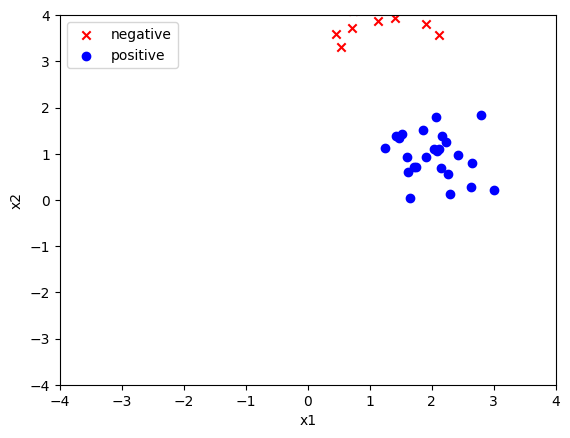

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_blobs, make_gaussian_quantiles


class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out


X, y = make_blobs(n_samples=50, centers=2, n_features=2,
                  random_state=0, cluster_std=0.5)
# X, y = make_gaussian_quantiles(
#     n_samples=100, n_features=2, n_classes=2, random_state=0)

display_sample(X, y)

model = LogisticRegression(2, 1)
criterion = nn.BCELoss()  # 二分类交叉熵
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD 优化器

# 训练模型
num_epochs = 10000
inputs = torch.tensor(X, dtype=torch.float32)
labels = torch.tensor(y, dtype=torch.float32).view(-1, 1)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch +
              1, num_epochs, loss.item()))

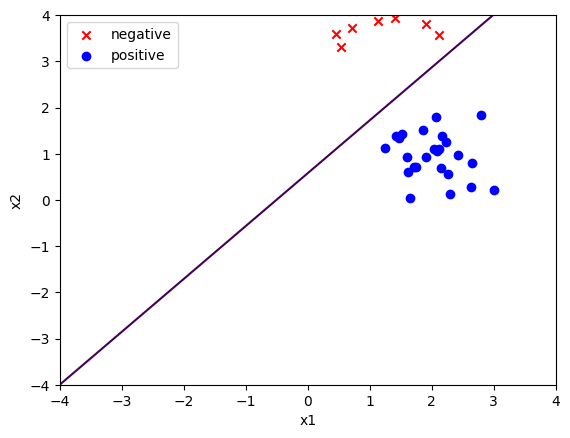

In [55]:
# 绘制决策边界
import matplotlib.pyplot as plt

x1_values = np.linspace(-4, 4, 100)
x2_values = np.linspace(-4, 4, 100)
x1, x2 = np.meshgrid(x1_values, x2_values)
z = np.c_[x1.ravel(), x2.ravel()]
z = torch.tensor(z, dtype=torch.float32)
outpusts = model(z)

display_sample(X, y)
plt.contour(x1, x2, outpusts.squeeze_().detach().reshape(100, 100).reshape(
    100, 100), levels=[0.5])

torch.Size([100, 100])